Dataset Informations:

1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
2)	MILK: annual spending (m.u.) on milk products (Continuous);
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

REGION	Frequency
Lisbon	77
Oporto	47
Other Region	316
Total	440

CHANNEL	Frequency
Horeca	298
Retail	142
Total	440

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
# Veritabanına bağlantı gerçekleştirdik.
# We have established a connection to the database.

engine = create_engine("sqlite:///WholesaleCustomersDatabase.db")
inspector = inspect(engine)

In [3]:
# İhtiyacımız olan tabloları çekmek için veritabanındaki tabloları görüntülüyoruz.
# We are viewing the tables in the database to retrieve the tables we need.

inspector.get_table_names()

['clients', 'purchases']

In [4]:
pd.read_sql(''' SELECT * FROM clients LIMIT(10)''', con=engine)

,customer_id,Channel,Region
0,1001,2,3
1,1002,2,3
2,1003,2,3
3,1004,1,3
4,1005,2,3
5,1006,2,3
6,1007,2,3
7,1008,2,3
8,1009,1,3
9,1010,2,3


In [5]:
pd.read_sql('''SELECT * FROM purchases LIMIT(10)''', con=engine)

,customer_id,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1001,12669,9656,7561,214,2674,1338
1,1002,7057,9810,9568,1762,3293,1776
2,1003,6353,8808,7684,2405,3516,7844
3,1004,13265,1196,4221,6404,507,1788
4,1005,22615,5410,7198,3915,1777,5185
5,1006,9413,8259,5126,666,1795,1451
6,1007,12126,3199,6975,480,3140,545
7,1008,7579,4956,9426,1669,3321,2566
8,1009,5963,3648,6192,425,1716,750
9,1010,6006,11093,18881,1159,7425,2098


In [6]:
df = pd.read_sql(''' SELECT 

                c.customer_id,
                c.Channel,
                c.Region,
                p.Fresh,
                p.Milk,
                p.Grocery,
                p.Frozen,
                p.Detergents_Paper,
                p.Delicassen   
                
                FROM clients c JOIN purchases p on c.customer_id = p.customer_id''', con=engine)

df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1001,2,3,12669,9656,7561,214,2674,1338
1,1002,2,3,7057,9810,9568,1762,3293,1776
2,1003,2,3,6353,8808,7684,2405,3516,7844
3,1004,1,3,13265,1196,4221,6404,507,1788
4,1005,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customer_id       440 non-null    int64
 1   Channel           440 non-null    int64
 2   Region            440 non-null    int64
 3   Fresh             440 non-null    int64
 4   Milk              440 non-null    int64
 5   Grocery           440 non-null    int64
 6   Frozen            440 non-null    int64
 7   Detergents_Paper  440 non-null    int64
 8   Delicassen        440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


In [8]:
df = df.set_index("customer_id")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
1001,2,3,12669,9656,7561,214,2674,1338
1002,2,3,7057,9810,9568,1762,3293,1776
1003,2,3,6353,8808,7684,2405,3516,7844
1004,1,3,13265,1196,4221,6404,507,1788
1005,2,3,22615,5410,7198,3915,1777,5185


In [9]:
print(df["Channel"].value_counts())
print(df["Region"].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64
Region
3    316
1     77
2     47
Name: count, dtype: int64


In [10]:
# Veri seti açıklamasını hatırlayalım;
# Let's recall the dataset description;

'''
REGION	Frequency
Lisbon	77
Oporto	47
Other Region	316
Total	440

CHANNEL	Frequency
Horeca	298
Retail	142
Total	440

'''

maps_Channel = {1 : "Horeca", 2 : "Retial"}
maps_Region = {1 : "Lisbon", 2 : "Oporto", 3 : "Other"}

df["Channel"] = df["Channel"].map(maps_Channel)
df["Region"] = df["Region"].map(maps_Region)

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
1001,Retial,Other,12669,9656,7561,214,2674,1338
1002,Retial,Other,7057,9810,9568,1762,3293,1776
1003,Retial,Other,6353,8808,7684,2405,3516,7844
1004,Horeca,Other,13265,1196,4221,6404,507,1788
1005,Retial,Other,22615,5410,7198,3915,1777,5185


In [11]:
# Ele alacağımız ve işleme tabi tutacağımız özellikleri "X" değişkeninde, referans sağlayacak özellikleri ise "y" değişkeninde tutuyoruz.
# We store the properties we will consider and process in the "X" variable, and the properties that will provide references in the "y" variable.

X = df.drop(columns=["Channel", "Region"])
y = df[["Channel", "Region"]]

In [12]:
print(X.head(), "\n")
print(y.head())

             Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
customer_id                                                            
1001         12669  9656     7561     214              2674        1338
1002          7057  9810     9568    1762              3293        1776
1003          6353  8808     7684    2405              3516        7844
1004         13265  1196     4221    6404               507        1788
1005         22615  5410     7198    3915              1777        5185 

            Channel Region
customer_id               
1001         Retial  Other
1002         Retial  Other
1003         Retial  Other
1004         Horeca  Other
1005         Retial  Other


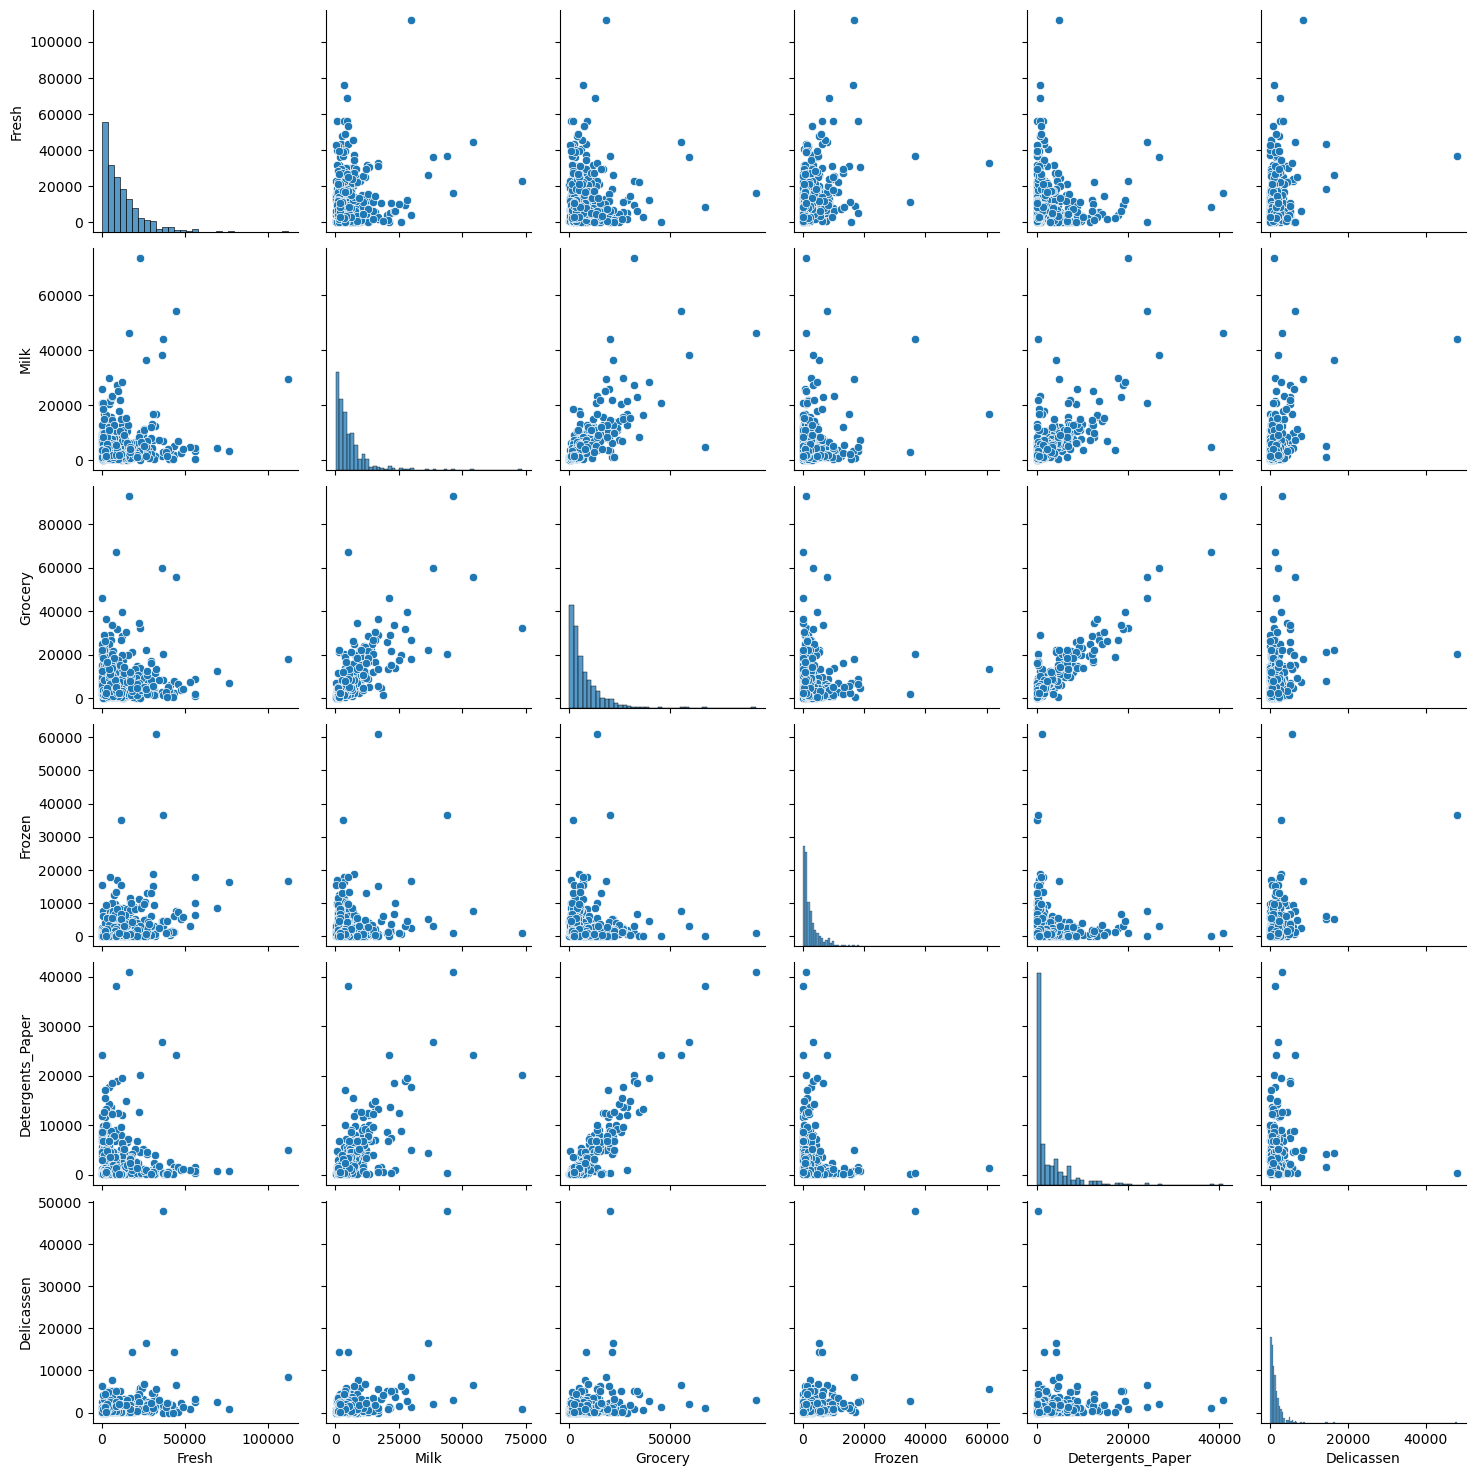

In [13]:
sns.pairplot(X)

In [14]:
# Sağa çarpık olarak önümüze çıkan dağılımları "yeo-johnson" metodu ile daha normal bir dağılıma çekeceğiz ki dağılım anormalliği hesaplamalarımızı manipüle etmesin.
# We will use the Yeo-Johnson method to shift the right-skewed distributions we encounter towards a more normal distribution so that the distribution anomaly does not manipulate our calculations.

from sklearn.preprocessing import PowerTransformer, StandardScaler
pt = PowerTransformer(method = "yeo-johnson")
X_transformed = pt.fit_transform(X)

In [15]:
scaler = StandardScaler()
X_scaling = scaler.fit_transform(X_transformed)

In [16]:
# Dağılımları çizen bir fonksiyon oluşturuyoruz. Daha sonra grafikler üzerinden karşılaştırma yapacağız.
# We are creating a function that plots the distributions. Then we will make comparisons using the graphs.
def histogram_all(data, prefix = ""):

    plt.figure(figsize=(10,6))

    for i, col in enumerate(data.columns):

        plt.subplot(2, 3, i+1)
        
        sns.histplot(data[col], kde=True)
        plt.xlabel(f"{prefix} - {col}", loc="center")
        plt.ylabel("")
        plt.tight_layout()

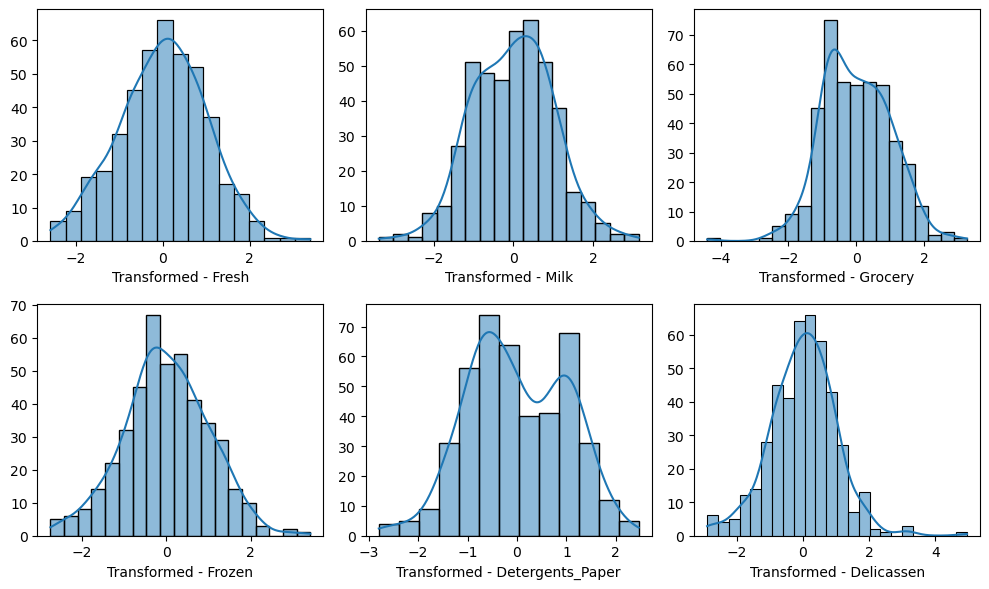

In [17]:
# Yeo-Johnson dönüşümü sonrası dağılım. / # Distribution after Yeo-Johnson transformation.

histogram_all(X_transformed, prefix="Transformed")

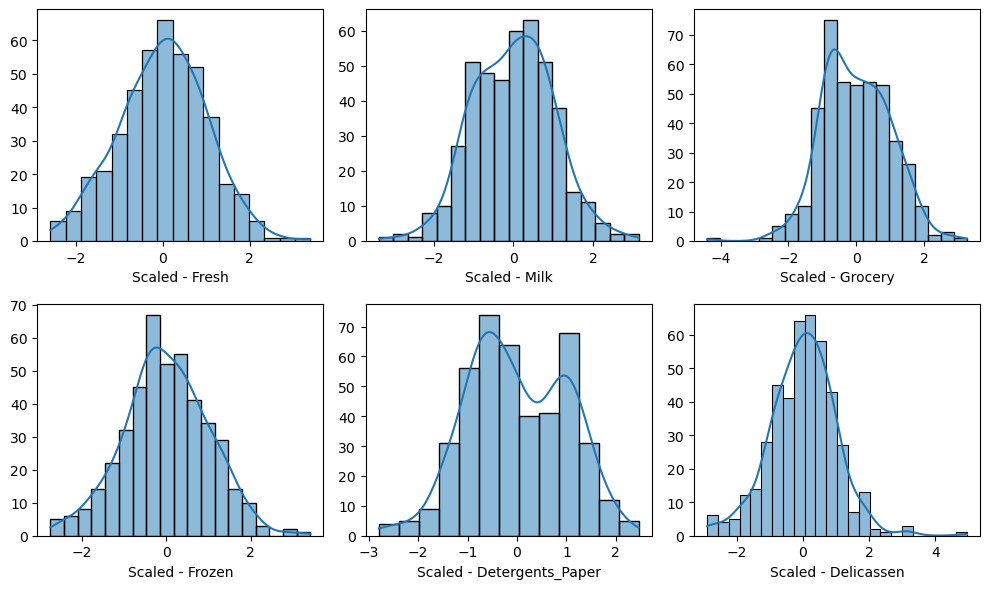

In [18]:
# Scaling sonrası dağılım. / # Distribution after scaling.

histogram_all(X_scaling, prefix="Scaled")

In [19]:
# Görüldüğü üzere "Standar Scale" işleminden sonra değişen bir durum olmamış. Bunun nedeni;
# PowerTransformer kendi içinde default olarak "standardize=True" ayarıyla gelir ve biz de o şekilde bıraktık. Bu ayar bize "yeo-johnson" dönüşümünden sonra veriye otomatik olarak "standart scaler" işlemi uygulayacağını söyler. 
# Fakat scaling işleminin ne kadar sağlıklı yapıldığını görmek için bu işlemi manuel yaparak bir karşılaştırma yaptık. Görüldüğü üzere "PowerTransformer" kendi içinde başarılı bir scaling işlemi gerçekleştirmiştir.

# As you can see, nothing changed after the "Standard Scale" operation. The reason for this is:
# PowerTransformer comes with the "standardize=True" setting by default, and we left it that way. This setting tells us that it will automatically apply a "standard scaler" operation to the data after the "yeo-johnson" transformation.
# However, to see how well the scaling operation was performed, we made a comparison by performing this operation manually. As you can see, "PowerTransformer" performed a successful scaling operation internally.

None
None


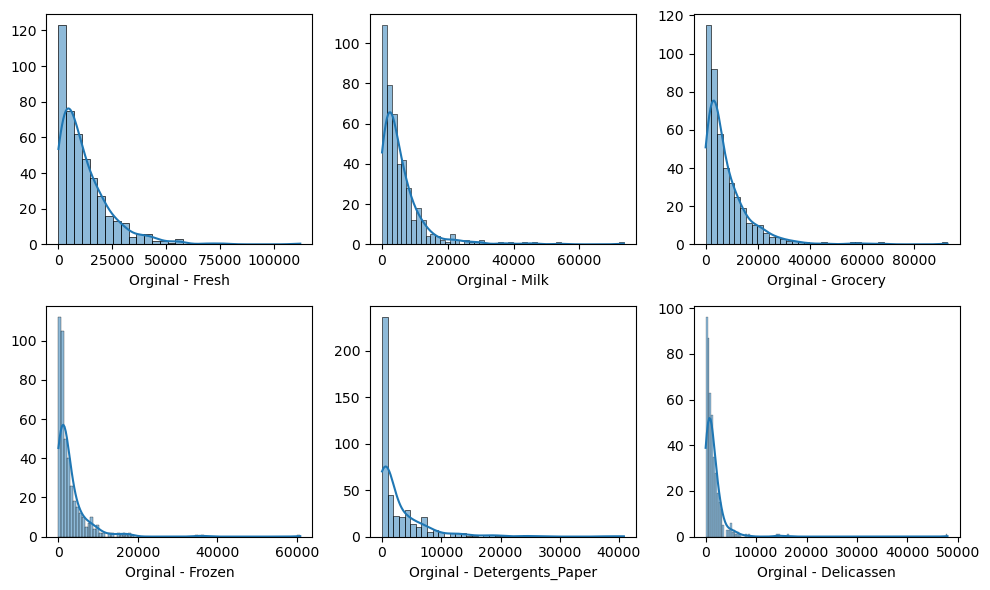

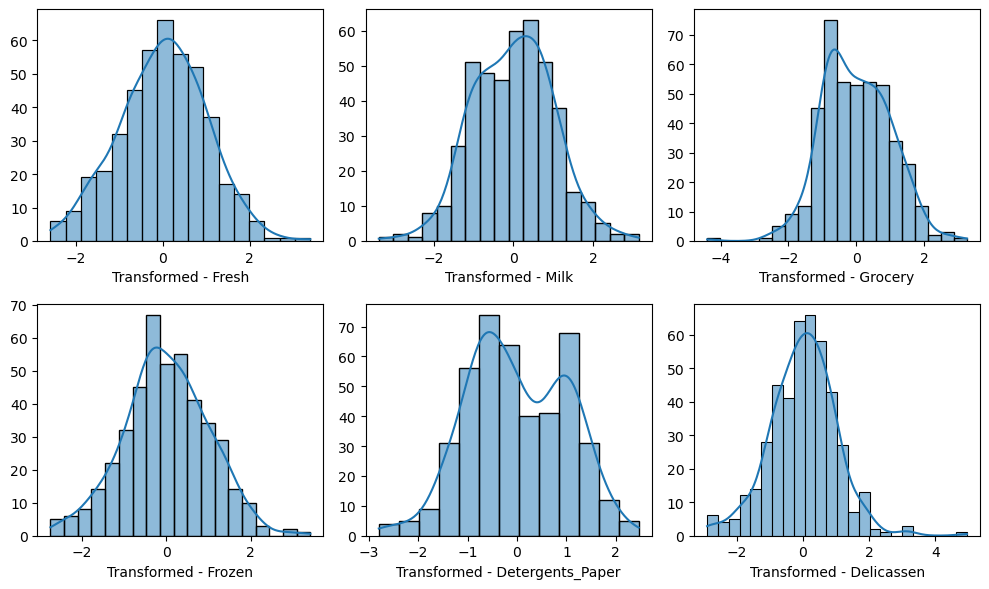

In [20]:
# Şimdi ise dağılımın nereden nereye geldiğini karşılaştırmalı olarak inceleyelim ve ardından hem dönüşüm yapılmış hem de scale edilmiş data (X_transformed) üzerinden işlemlerimize devam edelim.
# Now let's examine the evolution of the distribution from its origins to its current state, and then continue our analysis using both the transformed and scaled data (X_transformed).

print(histogram_all(X, prefix="Orginal"))
print(histogram_all(X_transformed, prefix="Transformed"))

In [21]:
# Verilerin dağılımına en uygun algoritmayı seçmek için öncelikle "PCA" ile veriyi 2 boyuta indirip gözlemleyeceğiz. Ardından bu veri setine en uygun kümelendirme algoritmasına karar verip devam edeceğiz.
# To select the most suitable algorithm for the data distribution, we will first reduce the data to two dimensions using "PCA" and observe it. Then, we will decide on the most appropriate clustering algorithm for this dataset and proceed.

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=35)
X_pca = pca.fit_transform(X_transformed)

X_pca.head()

,pca0,pca1
customer_id,,
1001,1.317178,-0.402363
1002,1.455039,0.326894
1003,1.668557,1.260240
1004,-0.853361,1.213330
1005,0.858253,1.959105


<Axes: xlabel='pca0', ylabel='pca1'>

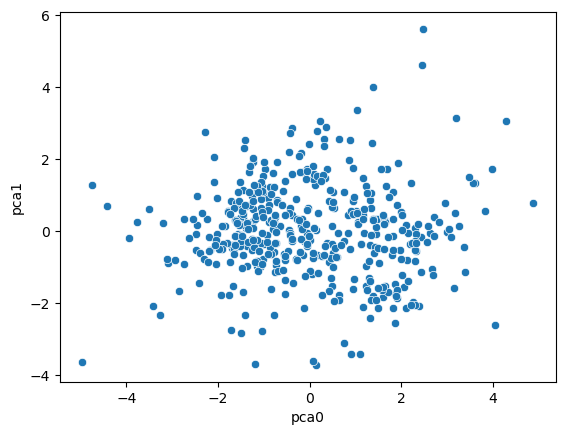

In [22]:
sns.scatterplot(X_pca, x="pca0", y="pca1")

# Bu dağılım grafiği için Kmeans algoritması daha uygun görünüyor.
# The KMeans algorithm seems more suitable for this scatter plot.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k, random_state=35)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
wcss

[1810.0904717578085,
 1519.4611413482005,
 1350.760378277125,
 1268.3337050594791,
 1212.156428212476,
 1109.5253657802016,
 1058.7624882079517,
 1042.9670555190937,
 955.1948202551021,
 901.7756614534362,
 873.8150081861063,
 832.418786815911,
 802.3434188977302]

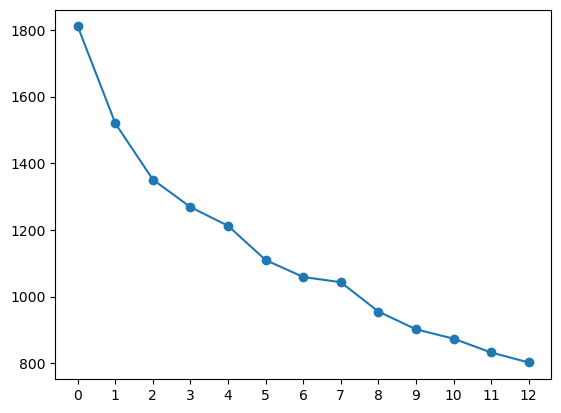

In [24]:
plt.plot(wcss, marker="o")
plt.xticks(range(13))
plt.show()

In [25]:
# Grafik yumuşak bir geçişe sahip. Bu yüzden küme sayısını netleştirmek için önemli bir metrik olan "Silhouette Score"dan faydalanacağız
# The graph has a smooth transition. Therefore, to clarify the number of clusters, we will use the "Silhouette Score," an important metric.

cluster_values = [2,3,4,5,6]
for k in cluster_values:
    kmeans = KMeans(n_clusters = k)
    cluster_labels = kmeans.fit_predict(X_transformed)
    print(f"Cluster Value: {k}, Score: {silhouette_score(X_transformed, cluster_labels)}")

Cluster Value: 2, Score: 0.2951617159401726
Cluster Value: 3, Score: 0.23622289827193235
Cluster Value: 4, Score: 0.19435378991606828
Cluster Value: 5, Score: 0.1850981872493436
Cluster Value: 6, Score: 0.1679325336279942


In [26]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X_transformed)
labels

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

<Axes: xlabel='pca0', ylabel='pca1'>

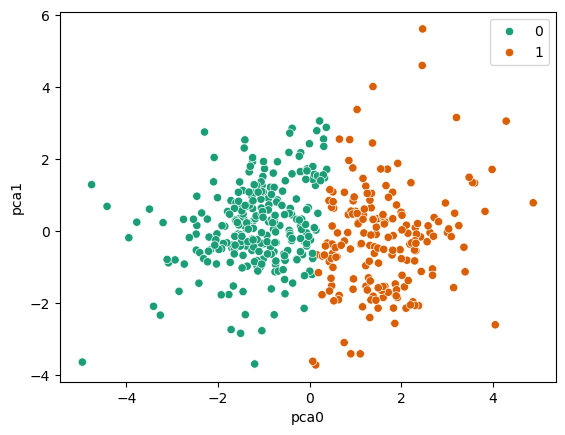

In [27]:
sns.scatterplot(X_pca, x="pca0", y="pca1",hue=labels, palette="Dark2")

In [28]:
df_analysis = X_transformed.copy()
df_analysis = pd.concat([df_analysis, y], axis=1)
df_analysis["labels"] = labels
df_analysis.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Region,labels
customer_id,,,,,,,,,
1001,0.413012,0.979454,0.394901,-1.457973,0.620530,0.338074,Retial,Other,1
1002,-0.110911,0.995243,0.628376,0.080081,0.751556,0.602222,Retial,Other,1
1003,-0.195814,0.888063,0.410688,0.332499,0.793104,2.240051,Retial,Other,1
1004,0.458126,-0.965336,-0.154740,1.173953,-0.372736,0.608674,Horeca,Other,0
1005,1.028870,0.412660,0.346961,0.742061,0.367767,1.737333,Retial,Other,1


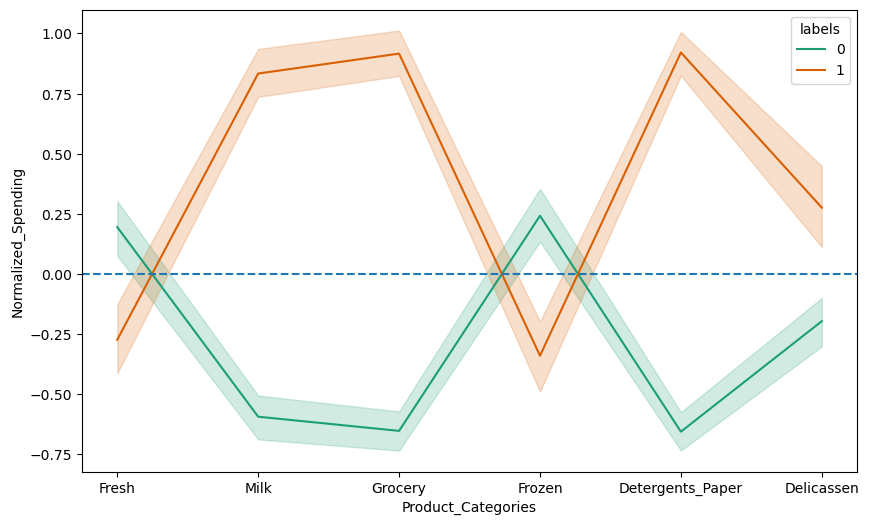

In [29]:
df_melt = pd.melt(df_analysis, id_vars="labels", 
                     value_vars=["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"],
                     var_name="Product_Categories",
                     value_name="Normalized_Spending")

plt.figure(figsize=(10,6))

sns.lineplot(df_melt, x="Product_Categories", y="Normalized_Spending", hue="labels", markers="o", palette="Dark2")
plt.axhline(linestyle="--")

In [30]:
# Önümüze çıkan bu küme grafiğine göre şu yorumu yapabiliriz: Taze ve dondurulmuş gıdalar daha otel, kafe ve restoran gibi işletmelerin talebiyken diğer stoklanabilir ürünler ise daha çok perakendecilerin talebidir. O halde; 0: Horeca, 1: Retial diyebiliriz.
# Based on this cluster graph, we can make the following interpretation: Fresh and frozen foods are more in demand by businesses such as hotels, cafes, and restaurants, while other storable products are more in demand by retailers. Therefore; 0: Horeca, 1: Retail.

<Axes: xlabel='Channel', ylabel='labels'>

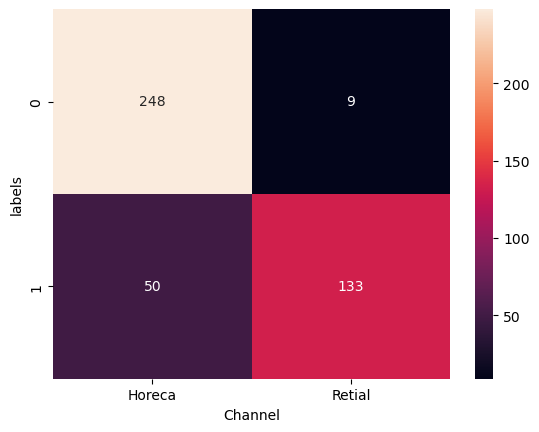

In [31]:
channel_cross = pd.crosstab(df_analysis["labels"], df_analysis["Channel"])
sns.heatmap(channel_cross, annot=True, fmt="d")

<Axes: xlabel='Region', ylabel='labels'>

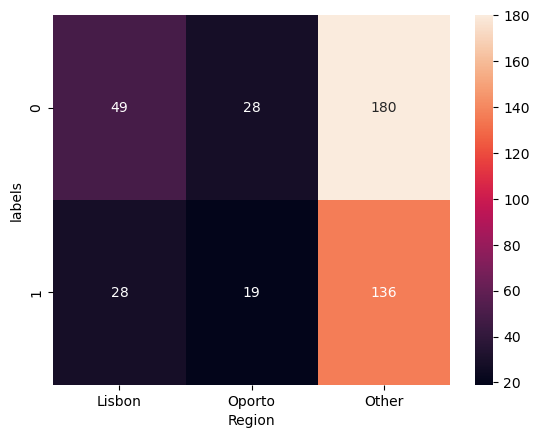

In [32]:
region_cross = pd.crosstab(df_analysis["labels"], df_analysis["Region"])
sns.heatmap(region_cross, annot=True, fmt="d")

In [33]:
# Yukarıda kümelerin "Channel" ve "Region" özellikleriyle ilişkisine bakıldığında kümelemenin bölge düzeyinde bir çıkarım yapmadığını ancak müşterinin işletmesi hakkında bize oldukça güvenilir bilgi verdiğini teyit etmiş olduk
# Bir sonraki adımda küme sayısını artırarak 2 gruba ayırdığımız bu müşteri profillerinin kendi içinde bir ayrım olup olmadığını inceleyeceğiz.

# By examining the relationship between the clusters and the "Channel" and "Region" attributes above, we have confirmed that clustering does not make inferences at the regional level, but it provides us with quite reliable information about the client's business.
# In the next step, we will increase the number of clusters and examine whether there is any internal differentiation within these customer profiles, which we have divided into two groups.

In [34]:
kmeans = KMeans(n_clusters=3, random_state=35)
labels_c3 = kmeans.fit_predict(X_transformed)

kmeans = KMeans(n_clusters=4, random_state=35)
labels_c4 = kmeans.fit_predict(X_transformed)

<Axes: xlabel='pca0', ylabel='pca1'>

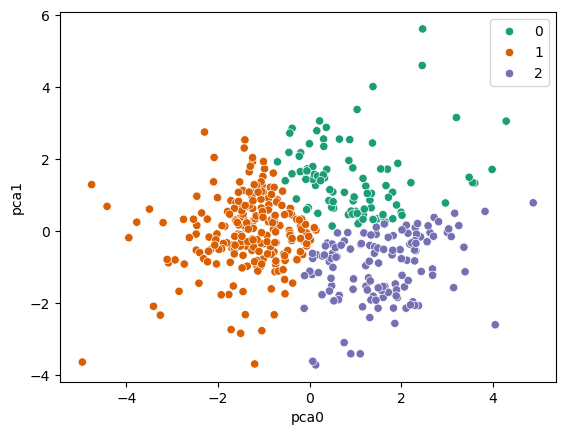

In [35]:
sns.scatterplot(X_pca, x="pca0", y="pca1",hue=labels_c3, palette="Dark2")

<Axes: xlabel='pca0', ylabel='pca1'>

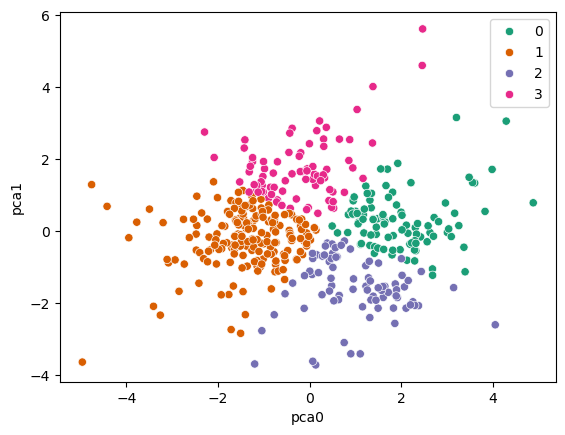

In [36]:
sns.scatterplot(X_pca, x="pca0", y="pca1",hue=labels_c4, palette="Dark2")

In [37]:
df_c4 = X_transformed.copy()
df_c4 = pd.concat([df_c4, y], axis=1)
df_c4["labels"] = labels_c4

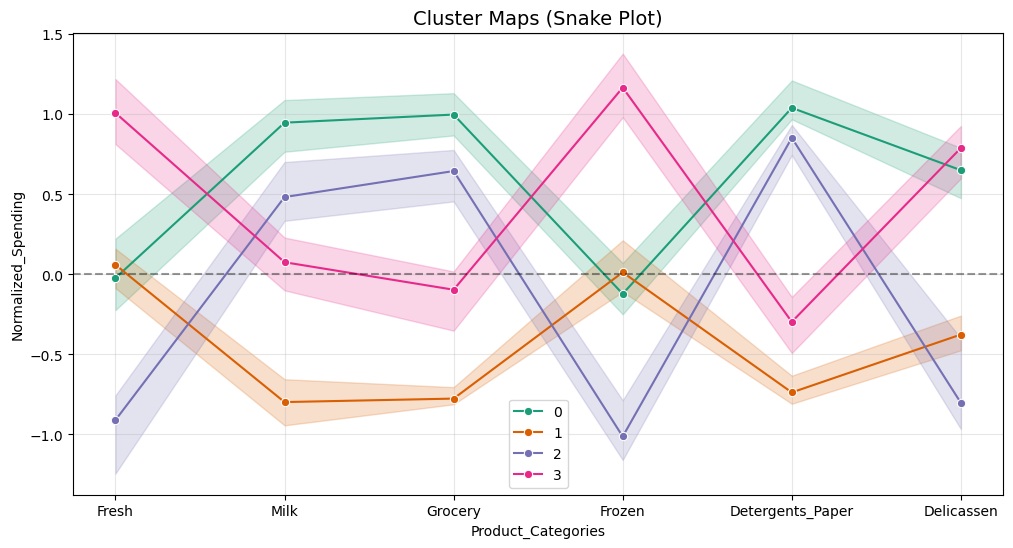

In [38]:
df_melt = pd.melt(df_c4, id_vars="labels", 
                     value_vars=["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"],
                     var_name="Product_Categories",
                     value_name="Normalized_Spending")

plt.figure(figsize=(12,6))

sns.lineplot(df_melt, x="Product_Categories", y="Normalized_Spending", hue="labels", marker="o", palette="Dark2", estimator=np.median)
plt.title('Cluster Maps (Snake Plot)', fontsize=14)
plt.axhline(linestyle="--", c="black", alpha=0.4)
plt.legend(loc="lower center")
plt.grid(True, alpha=0.3)

Nihai olarak şu sonuçlara varabiliriz; incelemekte olduğumuz şirketle olan ticarette:

* Küme 0: Genel olarak ve kendi sınıfı içinde (Retail) yüksek ticaret hacmine sahip işletmelerin kümesi.
* Küme 1: Genel olarak ve kendi sınıfı içinde (Horeca) düşük ticaret hacmine sahip işletmelerin kümesi.
* Küme 2: Nispeten daha düşük bir ticaret hacmine sahip Retail işletmelerin kümesi.(Bu işletmelerin taze ve dondurulmuş gıda talebi neredeyse sıfır.)
* Küme 3: Daha yüksek bir ticaret hacmine sahip Horeca (Hotel, Restoran, Kafe) işletmelerin kümesi.

Ultimately, we can draw the following conclusions regarding trade with the company we are examining:

* Cluster 0: A cluster of businesses with high trading volume overall and within their own class (Retail).
* Cluster 1: A cluster of businesses with low trading volume overall and within their own class (Horeca).
* Cluster 2: A cluster of Retail businesses with a relatively lower trading volume. (These businesses have almost zero demand for fresh and frozen food.)
* Cluster 3: A cluster of Horeca (Hotel, Restaurant, Cafe) businesses with a higher trading volume.

In [39]:
df_final = df.copy()
df_final["labels"] = labels_c4
df_final.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
customer_id,,,,,,,,,
1001,Retial,Other,12669,9656,7561,214,2674,1338,0
1002,Retial,Other,7057,9810,9568,1762,3293,1776,0
1003,Retial,Other,6353,8808,7684,2405,3516,7844,0
1004,Horeca,Other,13265,1196,4221,6404,507,1788,3
1005,Retial,Other,22615,5410,7198,3915,1777,5185,3


In [40]:
map_labels = {0: "High Retail (General Top)", 1: "Low Horeca (General Bottom)", 2: "Low Retail", 3: "High Horeca"}
df_final["labels"] = df_final["labels"].map(map_labels)
df_final.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
customer_id,,,,,,,,,
1001,Retial,Other,12669,9656,7561,214,2674,1338,High Retail (General Top)
1002,Retial,Other,7057,9810,9568,1762,3293,1776,High Retail (General Top)
1003,Retial,Other,6353,8808,7684,2405,3516,7844,High Retail (General Top)
1004,Horeca,Other,13265,1196,4221,6404,507,1788,High Horeca
1005,Retial,Other,22615,5410,7198,3915,1777,5185,High Horeca
1006,Retial,Other,9413,8259,5126,666,1795,1451,High Retail (General Top)
1007,Retial,Other,12126,3199,6975,480,3140,545,Low Retail
1008,Retial,Other,7579,4956,9426,1669,3321,2566,High Retail (General Top)
1009,Horeca,Other,5963,3648,6192,425,1716,750,Low Retail


In [41]:
pd.DataFrame(df_final.groupby(by="labels")["Region"].value_counts(normalize=True))

proportion
labels                      Region            
High Horeca                 Other     0.750000
                            Lisbon    0.150000
                            Oporto    0.100000
High Retail (General Top)   Other     0.711340
                            Lisbon    0.175258
                            Oporto    0.113402
Low Horeca (General Bottom) Other     0.688525
                            Lisbon    0.202186
                            Oporto    0.109290
Low Retail                  Other     0.762500
                            Lisbon    0.137500
                            Oporto    0.100000

Yüksek ve düşük satışlı kümeler arasında bölge bazında ters bir korelasyon mevcut değil. Böylelikle bölgelerin satışlar üzerinde olumlu veya olumsuz etkisinin olduğu söylenemez. Bu yüzden bölge bazında aksiyon olmak gereksiz maliyetlere yol açabilir veya kârdan zarar ettirebilir.

There is no inverse correlation between high and low sales clusters on a regional basis. Therefore, it cannot be said that regions have a positive or negative impact on sales. Consequently, taking action on a regional basis may lead to unnecessary costs or even a loss of profit.

In [42]:
pd.DataFrame(df_final.groupby(by="labels")["Channel"].value_counts(normalize=True))

proportion
labels                      Channel            
High Horeca                 Horeca     0.912500
                            Retial     0.087500
High Retail (General Top)   Retial     0.876289
                            Horeca     0.123711
Low Horeca (General Bottom) Horeca     0.983607
                            Retial     0.016393
Low Retail                  Retial     0.587500
                            Horeca     0.412500

In [43]:
pd.DataFrame(df_final.groupby(by="labels")["Channel"].value_counts(normalize=True))

proportion
labels                      Channel            
High Horeca                 Horeca     0.912500
                            Retial     0.087500
High Retail (General Top)   Retial     0.876289
                            Horeca     0.123711
Low Horeca (General Bottom) Horeca     0.983607
                            Retial     0.016393
Low Retail                  Retial     0.587500
                            Horeca     0.412500

* Burada "High Retail (General Top)" kümesine baktığımızda %12'lik bir Horeca grubu dikkat çekiyor. Perakendeci davranışına sahip bu Horeca (Hotel, Restoran, Kafe) işletmelerine daha özel kampanyalar sunmak üzerine aksiyon alınmalı. Yüksek ihtimalle bunlar büyük restoran işletmeleri.
* Low Retail kümesi ise bize %41'lik gibi ciddi bir (Otel, Restoran, Kafe) kesiminin perakendeci davranışta bulunduğunu gösteriyor. "Cluster Maps (Snake Plot)" grafiğine baktığımızda bu davranışa sebep olan etkenin "Milk, Grocery, Detergents_Paper" ürünlerine olan yüksek talep olduğu öne çıkıyor. Bu işletmelere ürün grubu bazında çeşitli kampanyalar sunulabilir.



* When we look at the "High Retail (General Top)" cluster, a 12% Horeca (Hotel, Restaurant, Cafe) group stands out. Action should be taken to offer more specific campaigns to these Horeca businesses exhibiting retailer behavior. Most likely, these are large restaurant businesses.
* The "Low Retail" cluster shows that a significant 41% (Hotel, Restaurant, Cafe) segment exhibits retailer behavior. Looking at the "Cluster Maps (Snake Plot)" graph, the high demand for "Milk, Grocery, Detergents_Paper" products appears to be the driving factor behind this behavior. Various campaigns can be offered to these businesses based on product groups.

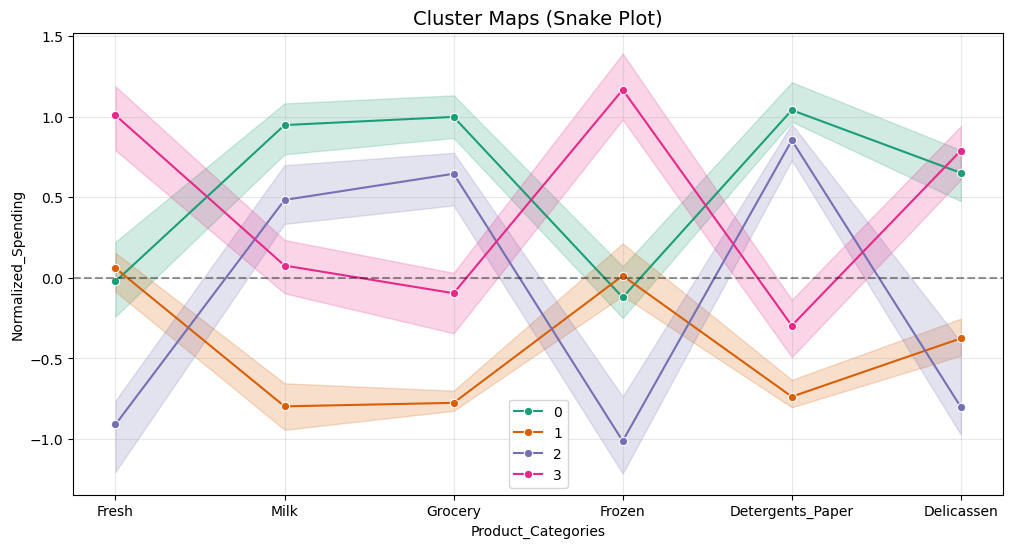

In [44]:
df_melt = pd.melt(df_c4, id_vars="labels", 
                     value_vars=["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"],
                     var_name="Product_Categories",
                     value_name="Normalized_Spending")

plt.figure(figsize=(12,6))

sns.lineplot(df_melt, x="Product_Categories", y="Normalized_Spending", hue="labels", marker="o", palette="Dark2", estimator=np.median)
plt.title('Cluster Maps (Snake Plot)', fontsize=14)
plt.axhline(linestyle="--", c="black", alpha=0.4)
plt.legend(loc="lower center")
plt.grid(True, alpha=0.3)

In [45]:
df_final[(df_final["labels"] == "High Retail (General Top)") & (df_final["Channel"] == "Horeca")].sum()

# Yukarıda tahmin yürüttüğümüz üzere "High Retail (General Top)" kümesindeki "Horeca" işletmelerinin davranışı "büyük restoran işletmesi" davranışına çok yatkın.
# As we predicted above, the behavior of "Horeca" businesses in the "High Retail (General Top)" cluster is very similar to that of "large restaurant business".

Channel             HorecaHorecaHorecaHorecaHorecaHorecaHorecaHore...
Region              OtherOtherOtherLisbonLisbonLisbonLisbonLisbonL...
Fresh                                                          135314
Milk                                                           113558
Grocery                                                        133734
Frozen                                                          28623
Detergents_Paper                                                29502
Delicassen                                                      28149
labels              High Retail (General Top)High Retail (General ...
dtype: object

In [46]:
df_final[(df_final["labels"] == "Low Retail") & (df_final["Channel"] == "Horeca")].sum()

Channel             HorecaHorecaHorecaHorecaHorecaHorecaHorecaHore...
Region              OtherOtherOtherOtherOtherOtherOtherOtherOtherO...
Fresh                                                          105516
Milk                                                           167217
Grocery                                                        225406
Frozen                                                          24114
Detergents_Paper                                                69907
Delicassen                                                      20773
labels              Low RetailLow RetailLow RetailLow RetailLow Re...
dtype: object

In [47]:
# Creating pipeline

from sklearn.pipeline import Pipeline

pipeline = Pipeline([

    ("transformer", PowerTransformer(method="yeo-johnson", standardize=True)),
    ("clustering", KMeans(n_clusters=4, random_state=35))
    
                    ])

pipeline.fit(X_transformed)

Pipeline(steps=[('transformer', PowerTransformer()),
                ('clustering', KMeans(n_clusters=4, random_state=35))])

In [48]:
# Model export

import joblib
joblib.dump(pipeline, "model_customer_clustering.pkl")

['model_customer_clustering.pkl']

In [49]:
# Model importing and testing

model_test_data = {
    
    "Fresh" : 8536,
    "Milk" : 1997,
    "Grocery" : 18376,
    "Frozen" : 1638,
    "Detergents_Paper" : 764,
    "Delicassen" : 2538 
    
                    }

model_test_data = pd.DataFrame([model_test_data])

model = joblib.load("model_customer_clustering.pkl")
print(model.predict(model_test_data))

[0]


In [50]:
model.set_output()

Pipeline(steps=[('transformer', PowerTransformer()),
                ('clustering', KMeans(n_clusters=4, random_state=35))])